## Simple Linear Regression




### Importing packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Create our own data

In [ ]:
datafile = pd.DataFrame()
datafile[0] = np.arange(0,5)
datafile[1] = [2,1,3,6,9]
datafile.columns =["X","Y"]
print(datafile)

   X  Y
0  0  2
1  1  1
2  2  3
3  3  6
4  4  9


## Checking Linearity


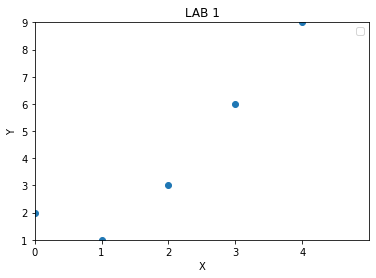

In [ ]:
plt.scatter(datafile['X'],datafile['Y'])
plt.title("LAB 1")
plt.xlim(0,5)
plt.ylim(1,9)
plt.xticks(np.arange(0,5,1))
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

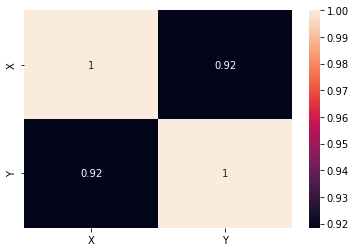

In [ ]:
import seaborn as sb
data_corr = datafile.corr()
sb.heatmap(data_corr,annot=True)

### Modeling

In [ ]:
from sklearn import linear_model
regress = linear_model.LinearRegression()

train_x = np.asanyarray(datafile[['X']])
train_y = np.asanyarray(datafile[['Y']])
#print(train_x)
#print(train_y)

regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)


Coefficients:  [[1.9]]
Intercept:  [0.4]


#### Plot outputs

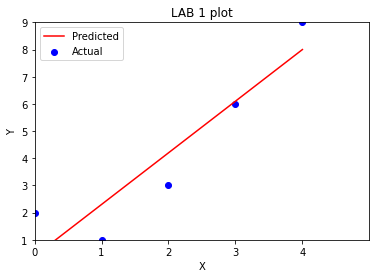

In [ ]:
plt.scatter(datafile.X, datafile.Y,  color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("LAB 1 plot")
plt.xlim(0,5)
plt.ylim(1,9)
plt.xticks(np.arange(0,5,1))
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
datafile['Predicted'] = y_predicted
print(y_predicted)
print(datafile.head())

[2] [0.4]
[1] [2.3]
[3] [4.2]
[6] [6.1]
[9] [8.]
[[0.4]
 [2.3]
 [4.2]
 [6.1]
 [8. ]]
   X  Y  Predicted
0  0  2        0.4
1  1  1        2.3
2  2  3        4.2
3  3  6        6.1
4  4  9        8.0


#### Performance measurement
Any of the following metrics may be used:
<ul>
    <li> Mean absolute error: It is the average of the absolute value of all the errors. </li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. This is efficient since the focus is on large errors and doesnot consider sign of error.</li>
    <li> Root Mean Squared Error (RMSE): This is a metric to calculate the accuracy of the model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 1.0399999999999998
Mean Squared Error: 1.3399999999999999
Root Mean Squared Error: 1.1575836902790224


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(datafile[['X']])
test_y = np.asanyarray(datafile[['Y']])
test_y_predicted = regress.predict(test_x)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 1.0399999999999998
Mean square error (MSE):  1.3399999999999999
R2-score: %.2f (RMSE): 0.8434579439252337


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(datafile[['X']], datafile[['Y']], test_size=0.30, random_state=42)
print(train_x)
print("Testing")
print(test_x)

from sklearn import linear_model
regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

   X
2  2
0  0
3  3
Testing
   X
1  1
4  4
Coefficients:  [[1.21428571]]
Intercept:  [1.64285714]


In [ ]:
y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)

   X
1  1
4  4
   Y
1  1
4  9
[[2.85714286]
 [6.5       ]]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))

Mean Absolute Error: 2.1785714285714284
Mean Squared Error: 4.849489795918367
Root Mean Squared Error: 2.202155715638285


In [ ]:
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei